In [1]:
import pandas as pd

# Read the input CSV file
df = pd.read_csv('metadata_master.csv')

# One-Hot Encode the GENDER column
df = pd.get_dummies(df, columns=['GENDER'], drop_first=True)

In [2]:
import pandas as pd

# Read the input CSV file
df = pd.read_csv('metadata_master.csv')

# One-Hot Encode the GENDER column
df = pd.get_dummies(df, columns=['GENDER'], drop_first=True)

# Calculate the number of male and female samples
num_male = df['GENDER_male'].sum()
num_female = len(df) - num_male
min_samples = min(num_male, num_female)

# Sample the data to have 50% male and 50% female
df_male = df[df['GENDER_male'] == 1].sample(n=min_samples, random_state=42)
df_female = df[df['GENDER_male'] == 0].sample(n=min_samples, random_state=42)

# Concatenate the samples to create a balanced DataFrame
df_balanced = pd.concat([df_male, df_female]).reset_index(drop=True)

Accuracy: 0.5830505918721255
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.79      0.69     15808
           1       0.47      0.27      0.35     10718

    accuracy                           0.58     26526
   macro avg       0.54      0.53      0.52     26526
weighted avg       0.56      0.58      0.55     26526


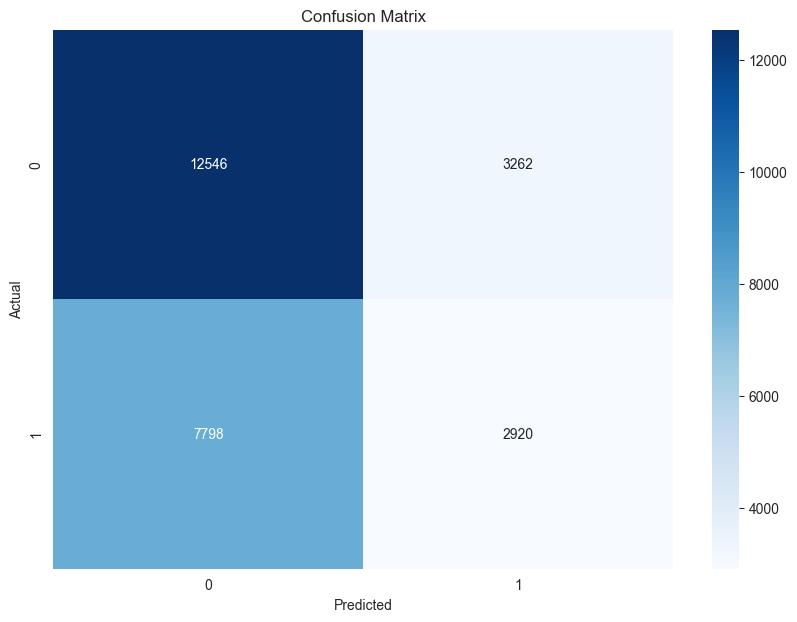

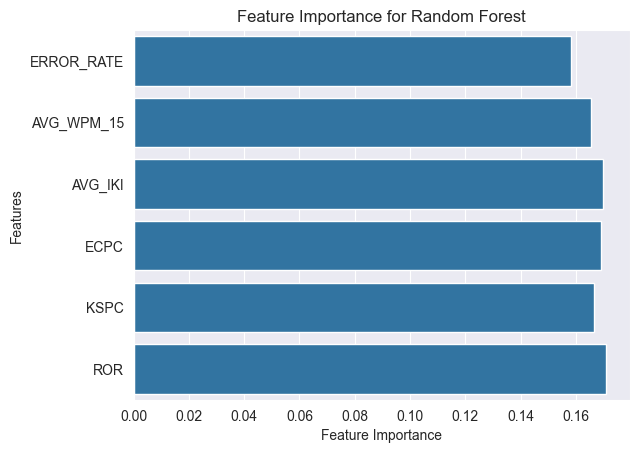

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
features = [
     'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI',
    'ECPC', 'KSPC', 'ROR'
]
X = df[features]
y = df['GENDER_male']  # Assuming 'male' is the one-hot encoded column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
feature_importance = rf_model.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest')
plt.show()

Accuracy: 0.559074115961698
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     15808
           1       0.45      0.37      0.41     10718

    accuracy                           0.56     26526
   macro avg       0.53      0.53      0.53     26526
weighted avg       0.55      0.56      0.55     26526


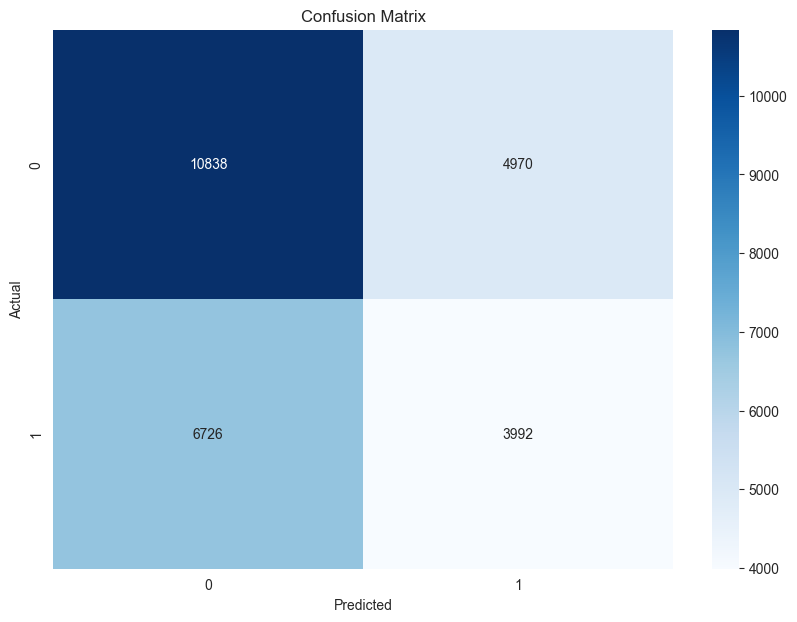

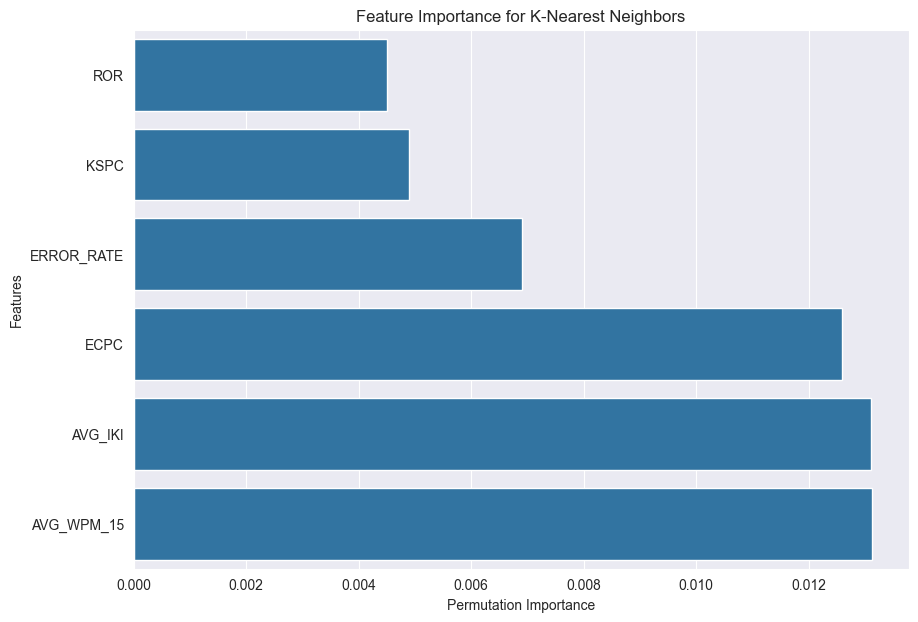

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
# features = [
#     'D1U1_MEAN', 'D1U2_MEAN', 'D1U3_MEAN', 'D1D2_MEAN', 'D1D3_MEAN', 'U1D2_MEAN',
#     'D1U1_Z_SCORE_MEAN', 'D1U2_Z_SCORE_MEAN', 'D1U3_Z_SCORE_MEAN', 'D1D2_Z_SCORE_MEAN',
#     'D1D3_Z_SCORE_MEAN', 'U1D2_Z_SCORE_MEAN', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI',
#     'ECPC', 'KSPC', 'ROR'
# ]
X = df[features]
y = df['GENDER_male']  # Assuming 'male' is the one-hot encoded column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate permutation importance
perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Plot feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 7))
sns.barplot(x=perm_importance.importances_mean[sorted_idx], y=[features[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance for K-Nearest Neighbors')
plt.show()

Accuracy: 0.6038226645555305
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.83      0.71     15808
           1       0.52      0.27      0.35     10718

    accuracy                           0.60     26526
   macro avg       0.57      0.55      0.53     26526
weighted avg       0.58      0.60      0.57     26526


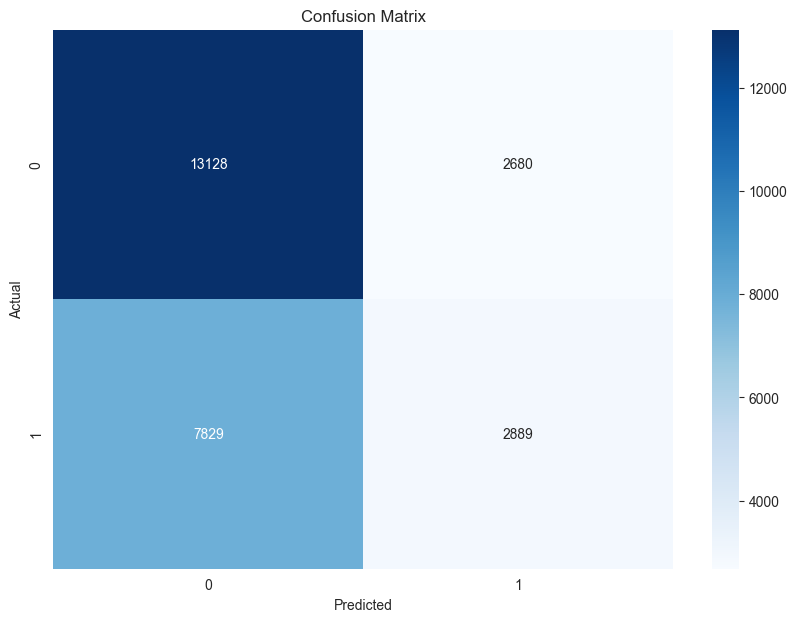

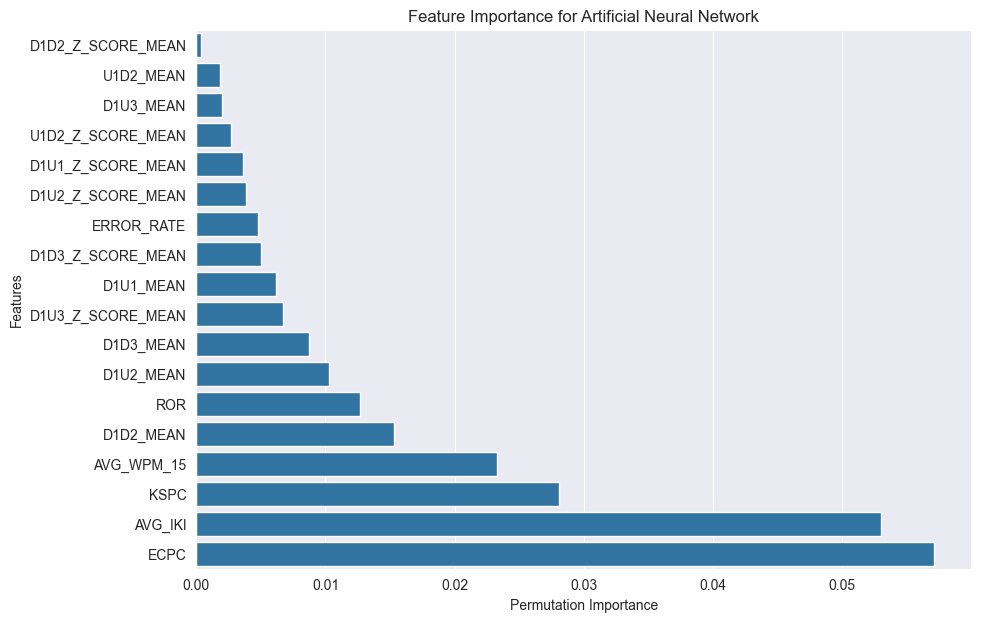

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
features = [
    'D1U1_MEAN', 'D1U2_MEAN', 'D1U3_MEAN', 'D1D2_MEAN', 'D1D3_MEAN', 'U1D2_MEAN',
    'D1U1_Z_SCORE_MEAN', 'D1U2_Z_SCORE_MEAN', 'D1U3_Z_SCORE_MEAN', 'D1D2_Z_SCORE_MEAN',
    'D1D3_Z_SCORE_MEAN', 'U1D2_Z_SCORE_MEAN', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI',
    'ECPC', 'KSPC', 'ROR'
]
X = df[features]
y = df['GENDER_male']  # Assuming 'male' is the one-hot encoded column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Artificial Neural Network model
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
ann_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ann_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate permutation importance
perm_importance = permutation_importance(ann_model, X_test, y_test, n_repeats=10, random_state=42)

# Plot feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 7))
sns.barplot(x=perm_importance.importances_mean[sorted_idx], y=[features[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Artificial Neural Network')
plt.show()

Accuracy: 0.60476513609289
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.94      0.74     15808
           1       0.55      0.11      0.19     10718

    accuracy                           0.60     26526
   macro avg       0.58      0.53      0.46     26526
weighted avg       0.59      0.60      0.52     26526


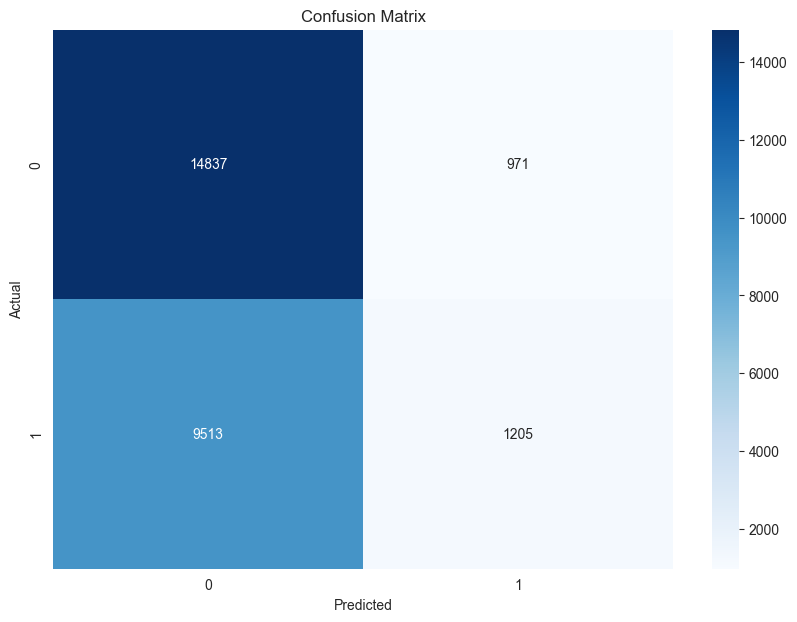

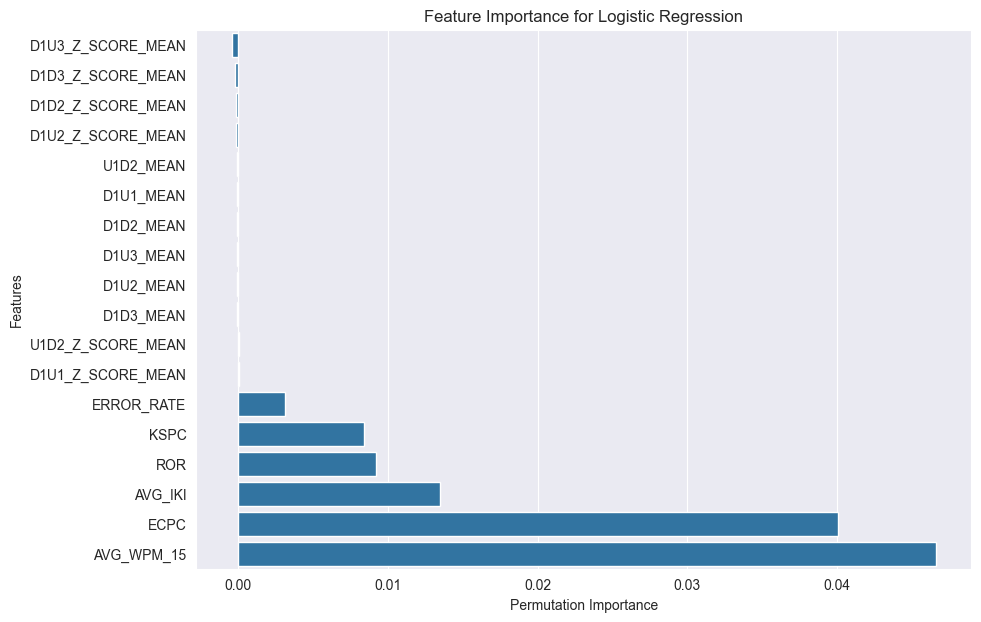

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate permutation importance
perm_importance = permutation_importance(logreg_model, X_test, y_test, n_repeats=10, random_state=42)

# Plot feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 7))
sns.barplot(x=perm_importance.importances_mean[sorted_idx], y=[features[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression')
plt.show()

Accuracy: 0.5303852823644726
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60     15808
           1       0.42      0.42      0.42     10718

    accuracy                           0.53     26526
   macro avg       0.51      0.51      0.51     26526
weighted avg       0.53      0.53      0.53     26526


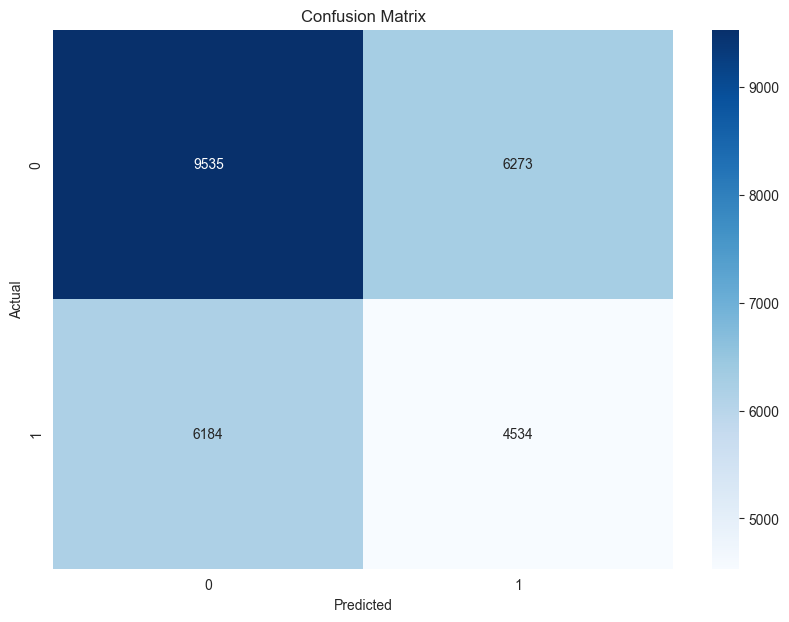

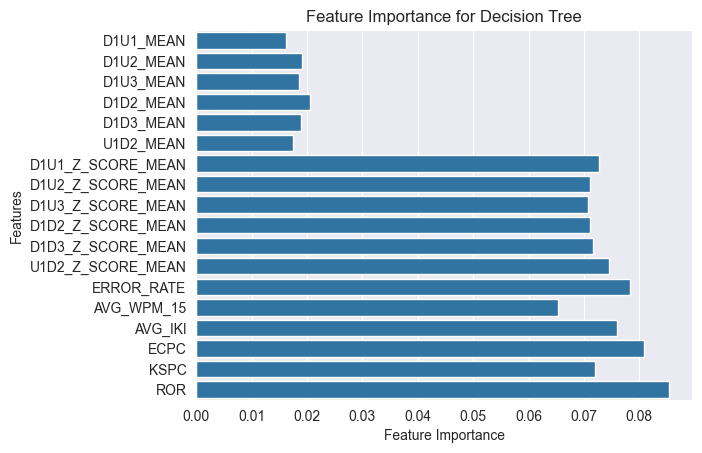

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
feature_importance = dt_model.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Decision Tree')
plt.show()

Accuracy: 0.6059338007992159
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.92      0.74     15808
           1       0.55      0.15      0.23     10718

    accuracy                           0.61     26526
   macro avg       0.58      0.53      0.48     26526
weighted avg       0.59      0.61      0.53     26526


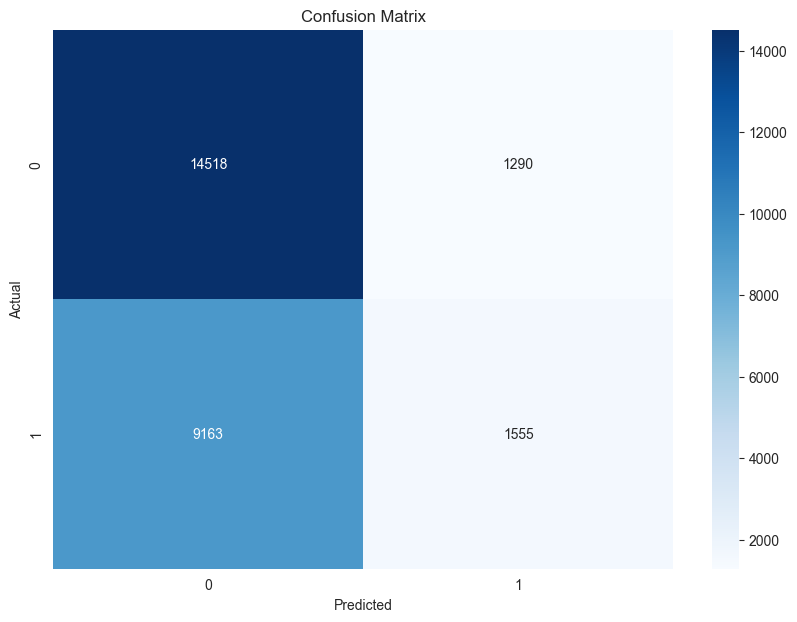

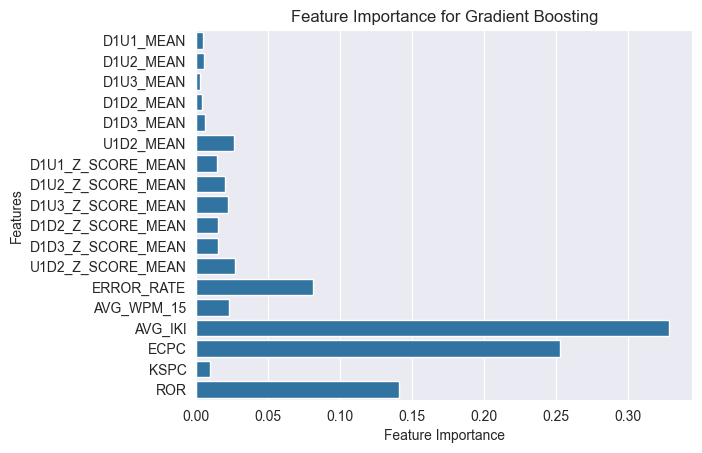

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
feature_importance = gb_model.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Gradient Boosting')
plt.show()

Accuracy: 0.5880645404508784
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.83      0.71     15808
           1       0.48      0.23      0.31     10718

    accuracy                           0.59     26526
   macro avg       0.55      0.53      0.51     26526
weighted avg       0.56      0.59      0.55     26526


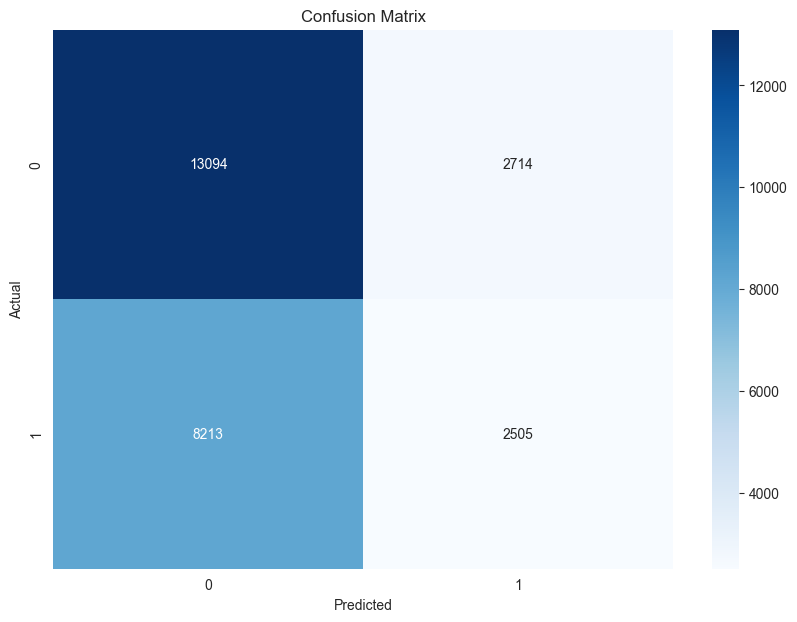

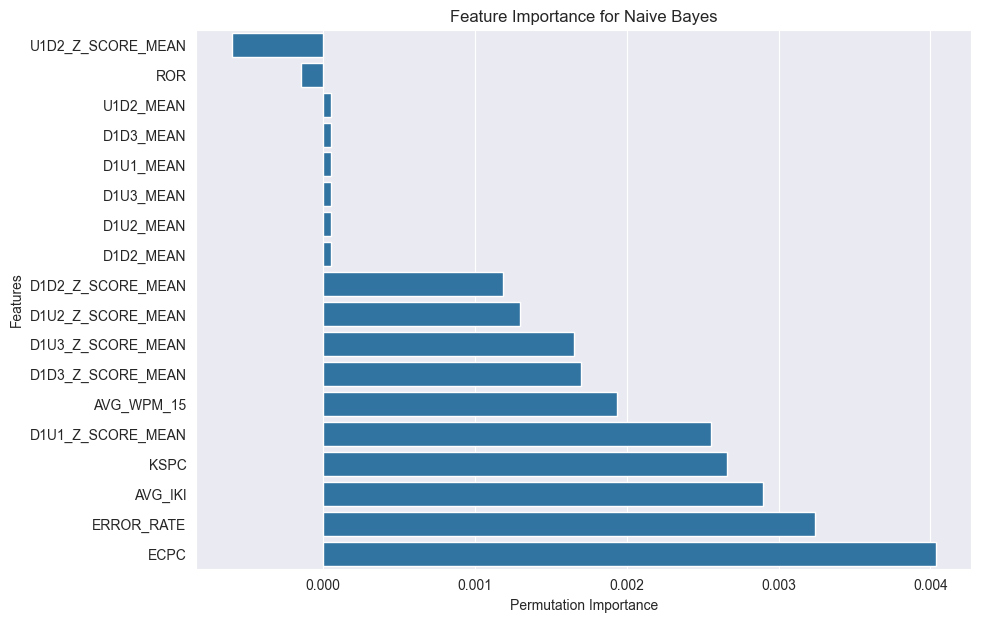

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate permutation importance
perm_importance = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=42)

# Plot feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 7))
sns.barplot(x=perm_importance.importances_mean[sorted_idx], y=[features[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Naive Bayes')
plt.show()

D:\Coding_Projects\erkd\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6034456759405866
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73     15808
           1       0.53      0.18      0.26     10718

    accuracy                           0.60     26526
   macro avg       0.57      0.53      0.50     26526
weighted avg       0.58      0.60      0.54     26526


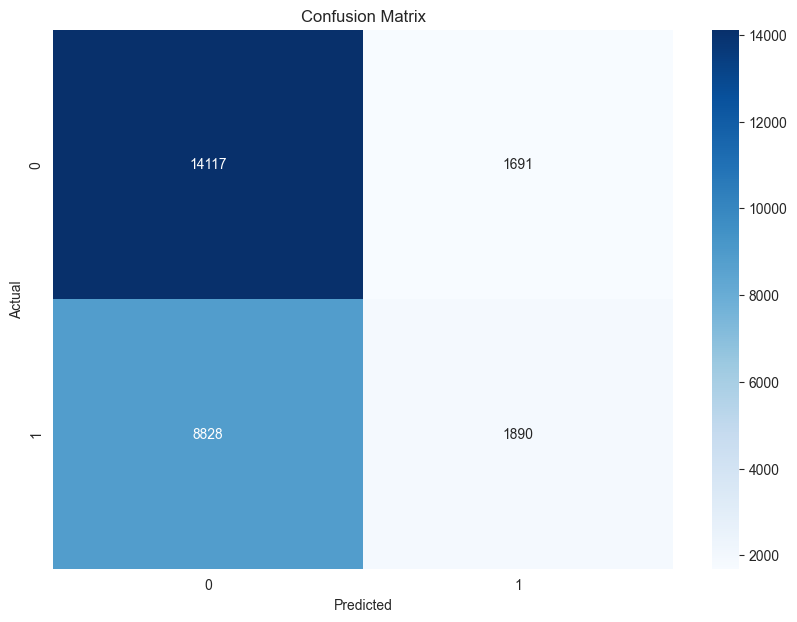

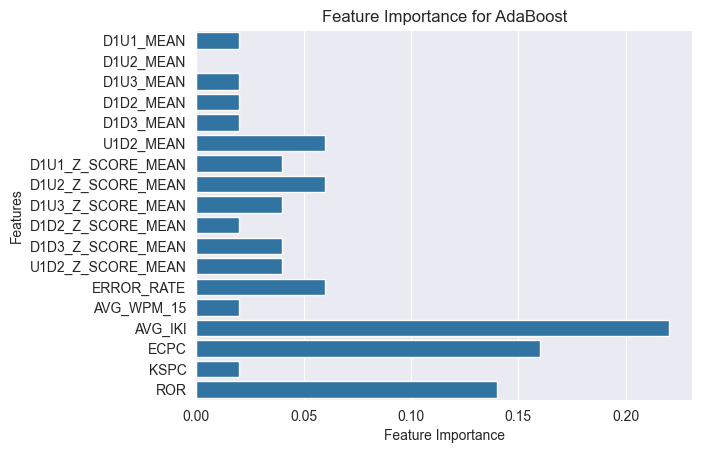

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
feature_importance = ada_model.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for AdaBoost')
plt.show()